In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('data.csv')

In [6]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1968,ham,2 laptop... I noe infra but too slow lar... I ...,NaN,NaN,NaN
4203,ham,How are you enjoying this semester? Take care ...,NaN,NaN,NaN
662,ham,Sorry me going home first... Daddy come fetch ...,NaN,NaN,NaN
3604,ham,Jordan got voted out last nite!,NaN,NaN,NaN
2083,ham,"you are sweet as well, princess. Please tell m...",NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

## 1.DATA CLEANING


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
## droping last 3 column
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [10]:
df.sample(5)

,v1,v2
1954,ham,Good night. Am going to sleep.
2168,ham,Thx. All will be well in a few months
5206,ham,I will reach ur home in &lt;#&gt; minutes
1250,ham,Ummmmmaah Many many happy returns of d day my ...
4711,ham,Thats cool princess! I will cover your face in...


In [11]:
df.rename(columns={'v1':'aim','v2':'msg'},inplace=True)
df.head()

,aim,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['aim']=encoder.fit_transform(df['aim'])

In [14]:
df.head()

,aim,msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
## missing value
df.isnull().sum()

aim    0
msg    0
dtype: int64

In [16]:
df.duplicated().sum()

403

In [17]:
#remove duplicate value
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

## 2.EDA

In [20]:
df.head()

,aim,msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['aim'].value_counts()

0    4516
1     653
Name: aim, dtype: int64

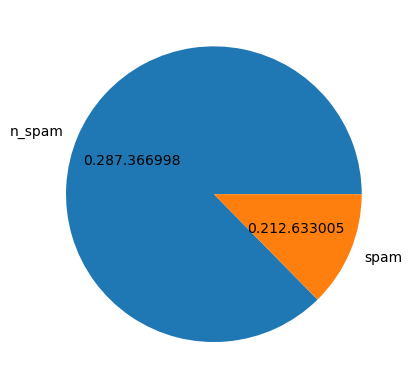

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['aim'].value_counts(),labels=['n_spam','spam'],autopct="0.2%f")
plt.show()

In [23]:
# we gonna add more columns for better analysis,for that we gonna need nltk library
!pip install nltk

In [27]:
import nltk

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Devarsh
[nltk_data]     Soni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
df['number_character'] = df['msg'].apply(len)

In [30]:
df.head()

,aim,msg,number_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [32]:
df['number_words']=df['msg'].apply(lambda x: len(nltk.word_tokenize(x)))

In [33]:
df.head()

,aim,msg,number_character,number_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [34]:
df['number_sentence']=df['msg'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [35]:
df.head()

,aim,msg,number_character,number_words,number_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [36]:
df[['number_character','number_words','number_sentence']].describe()

,number_character,number_words,number_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [39]:
df[df['aim']== 0][['number_character','number_words','number_sentence']].describe()

,number_character,number_words,number_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [40]:
df[df['aim']== 1][['number_character','number_words','number_sentence']].describe()

,number_character,number_words,number_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [41]:
import seaborn as sns

<AxesSubplot:xlabel='number_character', ylabel='Count'>

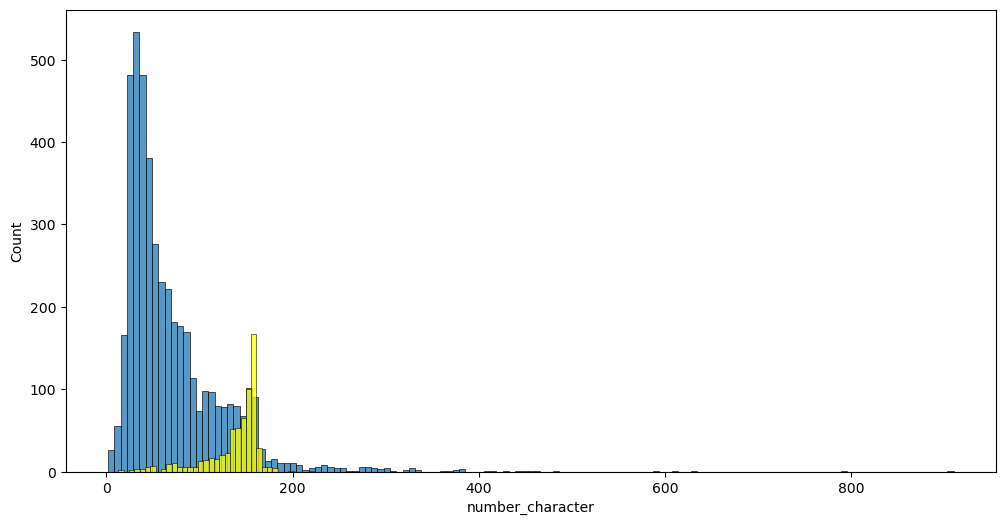

In [45]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['aim'] == 0]['number_character'])
sns.histplot(df[df['aim'] == 1]['number_character'],color='yellow')

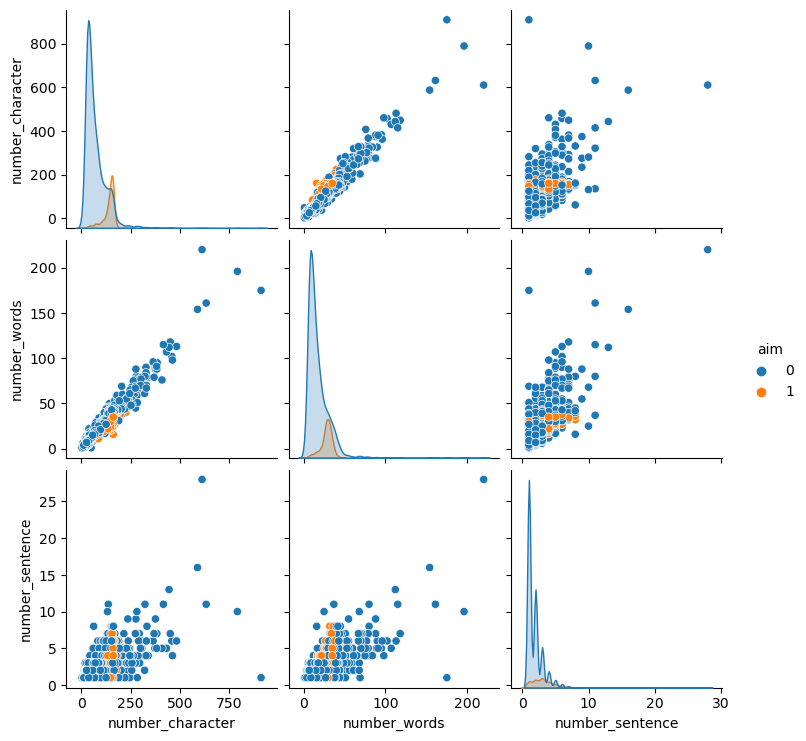

In [46]:
sns.pairplot(df,hue='aim')

<AxesSubplot:>

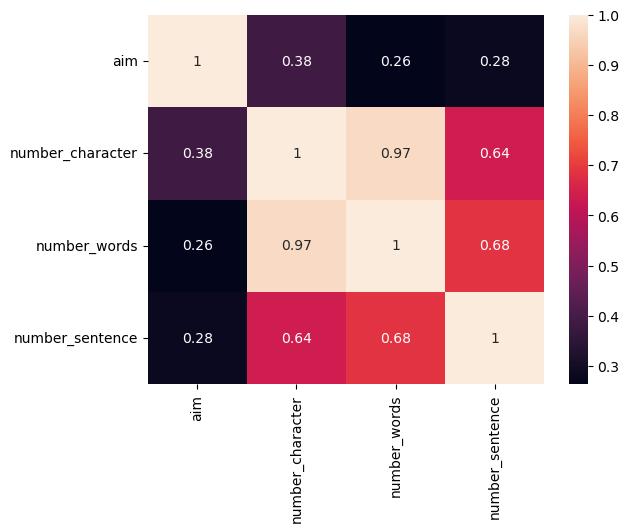

In [47]:
sns.heatmap(df.corr(),annot=True)

In [58]:
#As we can seen in heat map the correlation value of the columns with each other are so close, so we can consider the number of
#coloumn character 


## 3. Data Preprocessing

In [65]:
from nltk import corpus
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [66]:
#Gonna create a function to process the whole text
def transform_msg(msg):
    msg = msg.lower()
    msg = nltk.word_tokenize(msg)
    
    x = []
    
    for i in msg:
        if i.isalnum():
            x.append(i)
    
    msg = x[:]
    x.clear()
    
    for i in msg:
        if i not in stopwords.words('english') and i not in string.punctuation:
            x.append(i)
    
    msg = x[:]
    x.clear()
    
    for i in msg:
        x.append(ps.stem(i))
        
    return " ".join(x)

In [67]:
transform_msg("Hello How are you ??")

'hello'

In [69]:
df['transform_msg'] =df['msg'].apply(transform_msg)

In [70]:
df.head()

,aim,msg,number_character,number_words,number_sentence,transform_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [79]:
from wordcloud import WordCloud
wc = WordCloud(height=500,width=500,min_font_size=10,background_color='white')

In [84]:
n_spam_part = wc.generate(df[df['aim'] == 0] ['transform_msg'].str.cat(sep=" "))

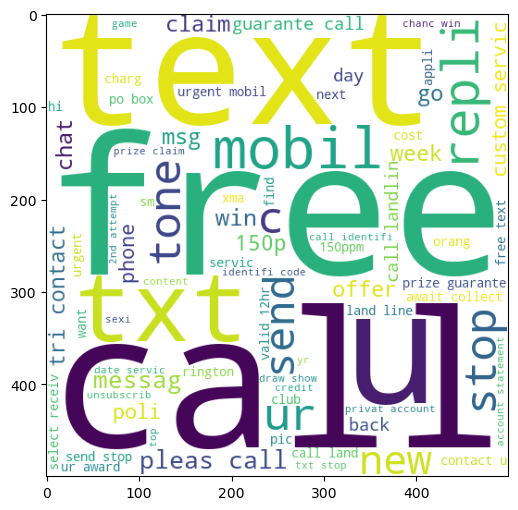

In [89]:
plt.figure(figsize=(15,6))
plt.imshow(n_spam_part)

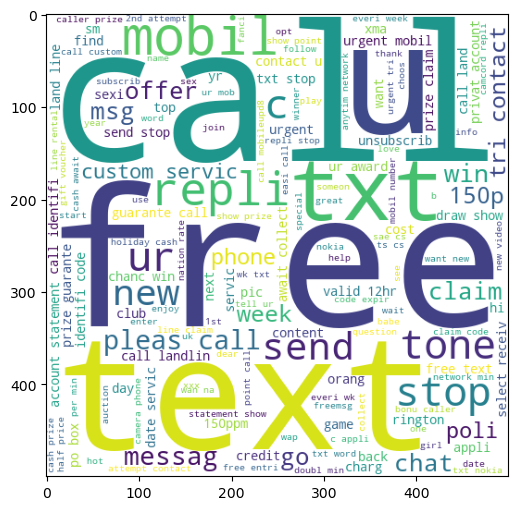

In [101]:
spam_part = wc.generate(df[df['aim'] == 1] ['transform_msg'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_part)

## 4.Model Training

In [102]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [103]:
X = tfidf.fit_transform(df['transform_msg']).toarray()

In [104]:
X.shape

(5169, 3000)

In [105]:
o = df['aim'].values

In [106]:
o

array([0, 0, 1, ..., 0, 0, 0])

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train,X_test,o_train,o_test = train_test_split(X,o,test_size=0.2,random_state=2)

In [135]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [136]:
gnb = GaussianNB()
mnm = MultinomialNB()
bnb = BernoulliNB()

In [142]:
gnb.fit(X_train,o_train)
o_pred1=gnb.predict(X_test)
print("Accuracy: ",accuracy_score(o_test,o_pred1))
print("Confusion Matrix: ",confusion_matrix(o_test,o_pred1))
print("Precision score: ",precision_score(o_test,o_pred1))

Accuracy:  0.8694390715667312
Confusion Matrix:  [[788 108]
 [ 27 111]]
Precision score:  0.5068493150684932


In [143]:
mnm.fit(X_train,o_train)
o_pred2=mnm.predict(X_test)
print("Accuracy: ",accuracy_score(o_test,o_pred2))
print("Confusion Matrix: ",confusion_matrix(o_test,o_pred2))
print("Precision score: ",precision_score(o_test,o_pred2))

Accuracy:  0.9709864603481625
Confusion Matrix:  [[896   0]
 [ 30 108]]
Precision score:  1.0


In [144]:
bnb.fit(X_train,o_train)
o_pred3=bnb.predict(X_test)
print("Accuracy: ",accuracy_score(o_test,o_pred3))
print("Confusion Matrix: ",confusion_matrix(o_test,o_pred3))
print("Precision score: ",precision_score(o_test,o_pred3))

Accuracy:  0.9835589941972921
Confusion Matrix:  [[895   1]
 [ 16 122]]
Precision score:  0.991869918699187


## TESTING OUR MODEL

In [ ]:
## As we are working on text it is been better to use the Naive BAyes algorithm , and in that we use different NB algo where
## we get that Multinomial NB gives us the more accuracy and more precision on our data so we gonna use that for our final model.  

In [147]:
def check():
    input_msg = input("Enter your SMS: ")
    transformed_msg = transform_msg(input_msg)
    vector_msg = tfidf.transform([transformed_msg])
    res = mnm.predict(vector_msg)[0]

    if (res == 1):
        print("SMS is SPAM")
    else:
        print("SMS is NOT SPAM")

In [148]:
check()

Enter your SMS: Hi I am free today. Let's go out for a movie. What do you say?
SMS is NOT SPAM


In [149]:
check()

Enter your SMS: Congratulations you won 1000 call on this number to get your prize call on this number.
SMS is SPAM
